# Quantifying Data Distortion

Teng-Jui Lin

- Created: 2023-05-28
- Edited: 2024-06-18

In [1]:
from bar_constants import *
set_save_fig_rc()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Control Experiment Bar Graphs

### Control 1

(0.0, 60.0)

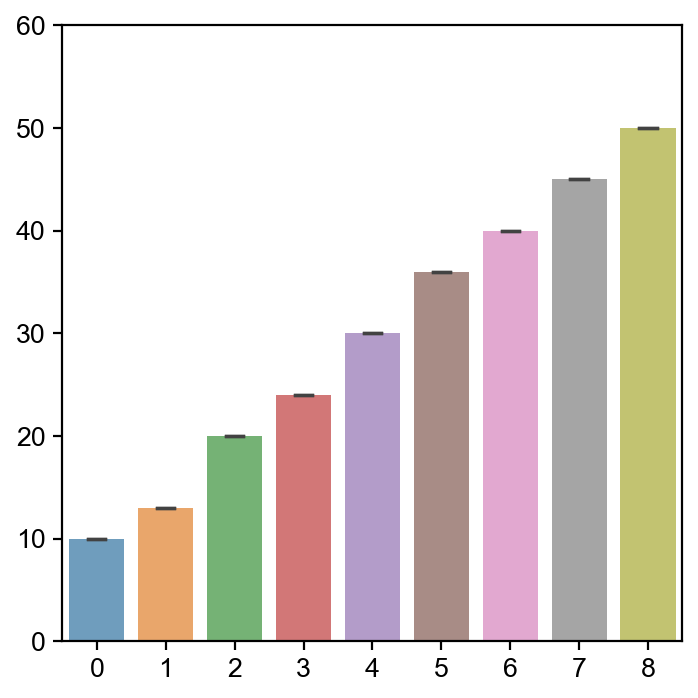

In [2]:
bar_df = pd.DataFrame(np.hstack([
    10 + np.zeros([SAMPLE_SIZE, 1]), 
    13 + np.zeros([SAMPLE_SIZE, 1]), 
    20 + np.zeros([SAMPLE_SIZE, 1]), 
    24 + np.zeros([SAMPLE_SIZE, 1]), 
    30 + np.zeros([SAMPLE_SIZE, 1]), 
    36 + np.zeros([SAMPLE_SIZE, 1]), 
    40 + np.zeros([SAMPLE_SIZE, 1]), 
    45 + np.zeros([SAMPLE_SIZE, 1]), 
    50 + np.zeros([SAMPLE_SIZE, 1]),
]))

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    bar_df,
    errorbar=BAR_ERRORBAR,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    ax=ax,
)
# ax.set_box_aspect(2)
ax.set_ylim(0, 60)

In [3]:
def get_size_of_effect(series):
    # get permutations of all items as 2d array
    comb_arr = itertools.permutations(series, 2)
    comb_arr = np.array(list(comb_arr))
    # calculate size of effect for each permutation as series
    effect = np.diff(comb_arr).reshape(-1) / comb_arr[:, 0]
    effect = pd.Series(effect)
    return effect


def _get_lie_factor(viz_series, val_series):
    return get_size_of_effect(viz_series) / get_size_of_effect(val_series)


def get_lie_factor(viz_series, val_series):
    return viz_series / val_series

In [4]:
control1_val_series = pd.Series(np.array([10, 13, 20, 24, 30, 36, 40, 45, 50]))
control1_val_series.name = 'Data Value'
control1_val_series

0    10
1    13
2    20
3    24
4    30
5    36
6    40
7    45
8    50
Name: Data Value, dtype: int64

In [5]:
control1_viz_df = pd.read_csv(os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'control', 'control_fig1.csv'), header=None, index_col=0)
control1_viz_df = control1_viz_df.reset_index(drop=True)
control1_viz_series = control1_viz_df.iloc[:, 0]
control1_viz_series.name = 'Visual Value'
control1_viz_series

0     9.868491
1    12.887194
2    19.898377
3    23.890856
4    29.928263
5    35.868292
6    39.860771
7    44.924403
8    49.890657
Name: Visual Value, dtype: float64

In [6]:
lie_factor_df = _get_lie_factor(control1_viz_series, control1_val_series)

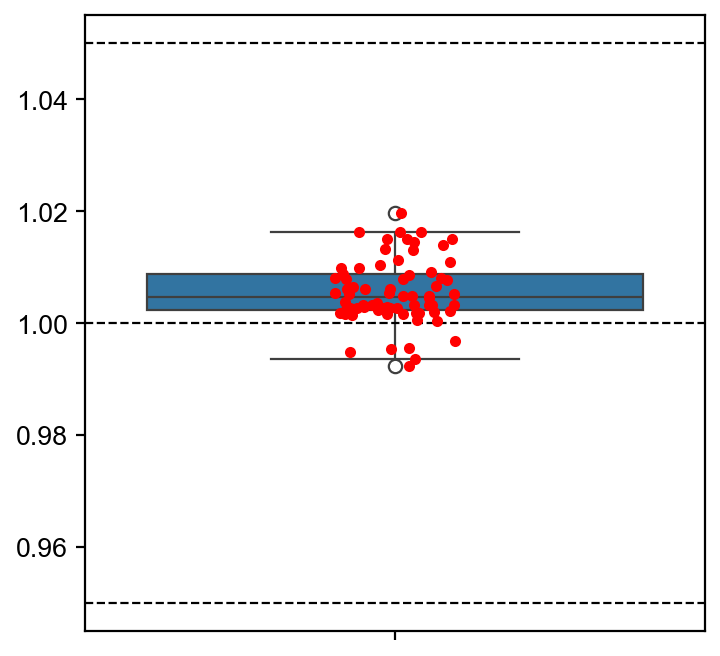

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(
    lie_factor_df,
    ax=ax,
    log_scale=False,
)
sns.stripplot(
    lie_factor_df,
    ax=ax,
    color='r',
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)

(-5.0, 1.5)

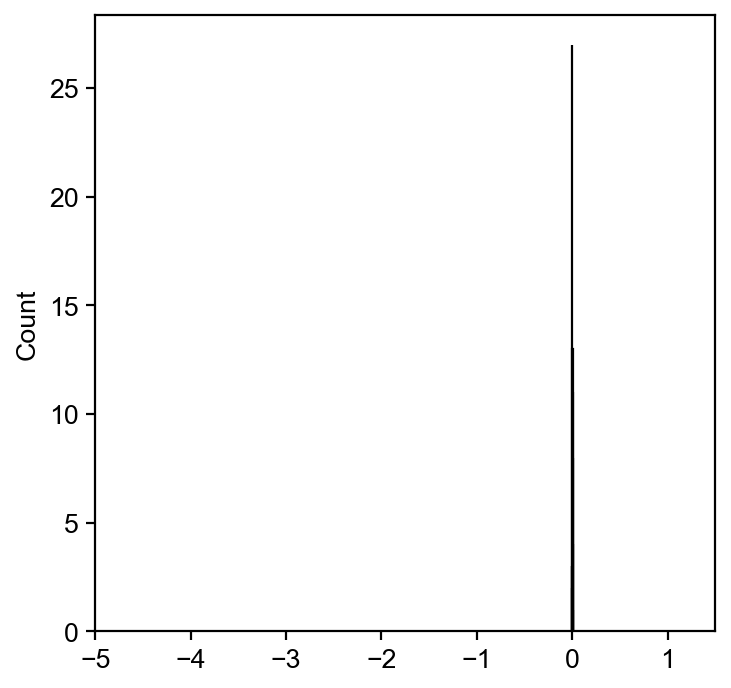

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    np.log10(lie_factor_df),
    ax=ax,
)
ax.set_xlim(-5, 1.5)

### Control 2

(0.0, 140.0)

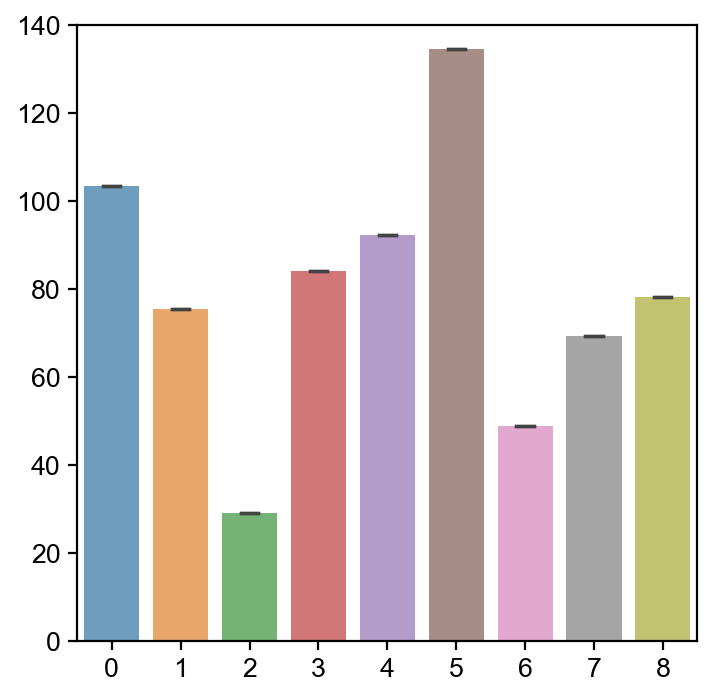

In [9]:
bar_df = pd.DataFrame(np.hstack([
    103.4 + np.zeros([SAMPLE_SIZE, 1]), 
    75.6 + np.zeros([SAMPLE_SIZE, 1]), 
    29.2 + np.zeros([SAMPLE_SIZE, 1]), 
    84.1 + np.zeros([SAMPLE_SIZE, 1]), 
    92.3 + np.zeros([SAMPLE_SIZE, 1]), 
    134.6 + np.zeros([SAMPLE_SIZE, 1]), 
    48.9 + np.zeros([SAMPLE_SIZE, 1]), 
    69.3 + np.zeros([SAMPLE_SIZE, 1]), 
    78.3 + np.zeros([SAMPLE_SIZE, 1]),
]))

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    bar_df,
    errorbar=BAR_ERRORBAR,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    ax=ax,
)
# ax.set_box_aspect(2)
ax.set_ylim(0, 140)

In [10]:
control2_val_series = pd.Series(np.array([103.4, 75.6, 29.2, 84.1, 92.3, 134.6, 48.9, 69.3, 78.3]))
control2_val_series.name = 'Data Value'
control2_val_series

0    103.4
1     75.6
2     29.2
3     84.1
4     92.3
5    134.6
6     48.9
7     69.3
8     78.3
Name: Data Value, dtype: float64

In [11]:
control2_viz_df = pd.read_csv(os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'control', 'control_fig2.csv'), header=None, index_col=0)
control2_viz_df = control2_viz_df.reset_index(drop=True)
control2_viz_series = control2_viz_df.iloc[:, 0]
control2_viz_series.name = 'Visual Value'
control2_viz_series

0    103.233107
1     75.285755
2     28.934049
3     83.919896
4     92.099609
5    134.361458
6     48.701688
7     68.923756
8     78.012326
Name: Visual Value, dtype: float64

In [12]:
lie_factor_df = _get_lie_factor(control2_viz_series, control2_val_series)

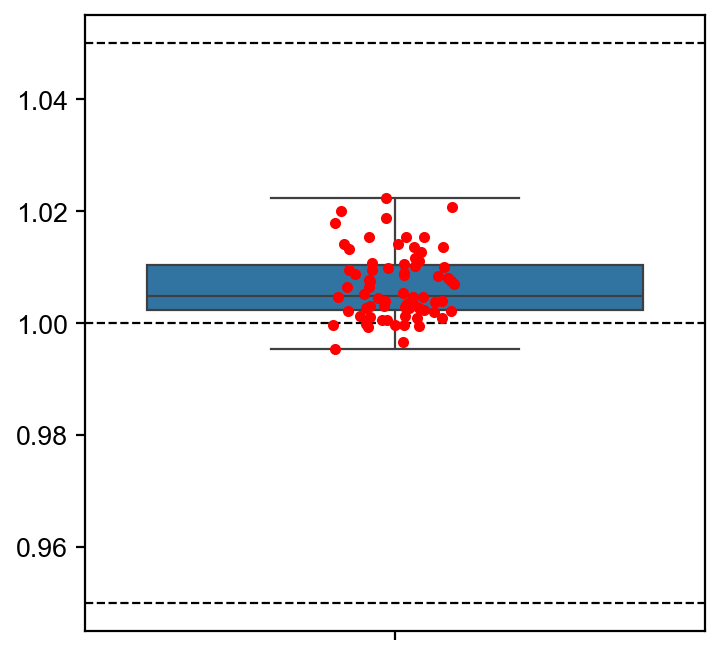

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(
    lie_factor_df,
    ax=ax,
    log_scale=False,
)
sns.stripplot(
    lie_factor_df,
    ax=ax,
    color='r',
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)

(-5.0, 1.5)

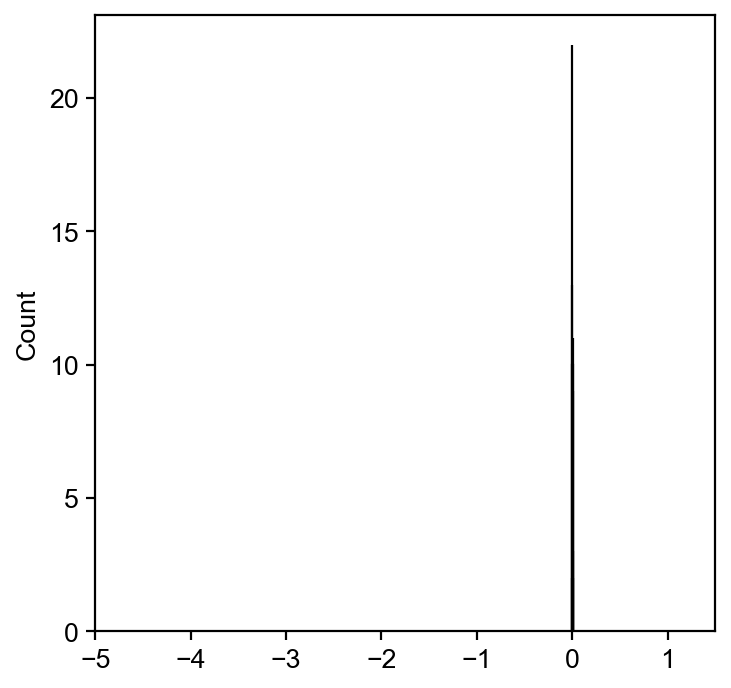

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    np.log10(lie_factor_df),
    ax=ax,
)
ax.set_xlim(-5, 1.5)

## Nature Biomedical Engineering

In [15]:
cv = lambda series: series.std() / series.mean()

## Graph annotations

In [16]:
journals = [
    'acs_nano',
    'bioeng_transl_med',
    'cell',
    'nat_biomed_eng',
    'nat_biotechnol',
    'nat_cancer',
    'nat_cell_biol',
    'nat_nanotechnol',
    'nat_neurosci',
    'nat_plants',
    # 'nature',
    'sci_immunol',
    'sci_signal',
    'sci_transl_med',
    'science',
]
mistakes = [ZERO_SUBDIR, LOG_SUBDIR]
bar_annot_df_list = []
for journal in journals:
    mistake_bar_annot_df_list = []
    for mistake in mistakes:
        # get filepaths of graph quantity annotation
        annot_df_ = pd.read_excel(os.path.join(f'data/misused_bar_graph_figures/{journal}/{mistake}', 'annotation.xlsx'), index_col=0)
        mistake_bar_annot_df_list.append(annot_df_)
    # construct journal-level annotation df
    journal_annot_df = pd.concat(mistake_bar_annot_df_list)
    bar_annot_df_list.append(journal_annot_df)
    
# construct overall df
bar_annot_df = pd.concat(bar_annot_df_list)
bar_annot_df

,DOI,Mistake,Fig ID,Journal,Quantity,Absolute/Relative,Measurement Type,Physical quantity I,Physical quantity II,Log transformation
Fig Index,,,,,,,,,,
10.1021:acsnano.2c07293_zero_fig1,10.1021:acsnano.2c07293,zero,1,acs_nano,Temperature (°C),Relative,Measured value,Temperature,Temperature,No
10.1021:acsnano.2c07436_zero_fig1,10.1021:acsnano.2c07436,zero,1,acs_nano,Hydroxy radicals scavenging (%),Relative,Percentage,Percentage,Percentage,No
10.1021:acsnano.2c07439_zero_fig1,10.1021:acsnano.2c07439,zero,1,acs_nano,Intracellular MFI (a.u.),Relative,Calculated value,Relative luminescence,Fluorescence,No
10.1021:acsnano.2c08153_zero_fig1,10.1021:acsnano.2c08153,zero,1,acs_nano,Wavelength shift (nm),Absolute,Measured value,Length,Length,No
10.1021:acsnano.2c08190_zero_fig1,10.1021:acsnano.2c08190,zero,1,acs_nano,Percentage of DCF fluorescence (%),Relative,Percentage,Percentage,Percentage,No
...,...,...,...,...,...,...,...,...,...,...
10.1126:science.adi2246_log_fig2,10.1126:science.adi2246,log,2,science,Relative fold change cs WT (normalized by GAPDH),Relative,Ratio,Ratio,Ratio,No
10.1126:science.adi2246_log_fig3,10.1126:science.adi2246,log,3,science,Relative gene expression (vs GAPDH),Relative,Ratio,Ratio,Ratio,No
10.1126:science.adi8885_log_fig1,10.1126:science.adi8885,log,1,science,KO/WT (log10),Relative,Ratio,Ratio,Ratio,10


In [17]:
bar_annot_df[bar_annot_df['Quantity'].str.contains('CFU') & ~bar_annot_df['Physical quantity I'].str.contains('Titer')]

,DOI,Mistake,Fig ID,Journal,Quantity,Absolute/Relative,Measurement Type,Physical quantity I,Physical quantity II,Log transformation
Fig Index,,,,,,,,,,
10.1126:scisignal.abj8194_log_fig1,10.1126:scisignal.abj8194,log,1,sci_signal,RFU (normalized to CFU),Relative,Calculated value,Relative luminescence,Fluorescence,No


In [18]:
, 'Angle', 'Area', 'Energy', ,'', '', 'Rate', 'Volume'
bar_annot_df[bar_annot_df['Physical quantity I'].isin([
    'Colony count'
       
])]

,DOI,Mistake,Fig ID,Journal,Quantity,Absolute/Relative,Measurement Type,Physical quantity I,Physical quantity II,Log transformation
Fig Index,,,,,,,,,,


In [19]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().index

Index(['Bioluminescence', 'Concentration', 'Constant', 'Count', 'Fluorescence',
       'Length', 'Mass', 'Others', 'Percentage', 'Prediction metric', 'Ratio',
       'Statistics', 'Temperature', 'Time'],
      dtype='object', name='Physical quantity II')

In [20]:
bar_annot_df[bar_annot_df['Physical quantity II'] == 'Concentration'].groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count()

,DOI,Mistake,Fig ID
Physical quantity I,,,
Characteristic concentration,16,16,16
Concentration,60,60,60
Cytokine concentration,34,34,34
Titer,63,63,63


In [21]:
for quant_idx in bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().index:
    print(bar_annot_df[bar_annot_df['Physical quantity II'] == quant_idx].groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count())

                       DOI  Mistake  Fig ID
Physical quantity I                        
Radiance                 3        3       3
Radiant efficiency       2        2       2
Radiant flux             7        7       7
Relative luminescence   12       12      12
                              DOI  Mistake  Fig ID
Physical quantity I                               
Characteristic concentration   16       16      16
Concentration                  60       60      60
Cytokine concentration         34       34      34
Titer                          63       63      63
                     DOI  Mistake  Fig ID
Physical quantity I                      
Constant              21       21      21
Index                 22       22      22
                     DOI  Mistake  Fig ID
Physical quantity I                      
Cell count            37       37      37
Count                 75       75      75
                          DOI  Mistake  Fig ID
Physical quantity I                           


In [22]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index()

,DOI,Mistake,Physical quantity I,Fig ID
0,10.1002:btm2.10487,log,Constant,2
1,10.1002:btm2.10499,zero,Concentration,1
2,10.1002:btm2.10499,zero,Cytokine concentration,5
3,10.1002:btm2.10504,zero,Titer,1
4,10.1002:btm2.10505,zero,Titer,2
...,...,...,...,...
1011,10.1126:scitranslmed.adh4529,log,Count,1
1012,10.1126:scitranslmed.adh7668,zero,Count,1
1013,10.1126:scitranslmed.adi1617,log,Radiance,1
1014,10.1126:scitranslmed.adi7244,zero,Cell percentage,3


In [23]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count()

,DOI,Mistake,Fig ID
Physical quantity I,,,
AUC,8,8,8
Accuracy,9,9,9
Angle,4,4,4
Area,4,4,4
Cell count,37,37,37
Cell percentage,44,44,44
Cell viability,18,18,18
Characteristic concentration,16,16,16
Colon length,8,8,8


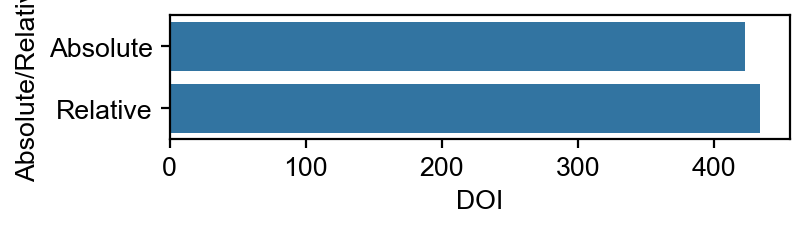

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    data=bar_annot_df.groupby(['DOI', 'Mistake', 'Absolute/Relative']).count().iloc[:, 0].reset_index().groupby(['Absolute/Relative']).count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby(['DOI', 'Mistake', 'Absolute/Relative']).count().iloc[:, 0].reset_index().groupby(['Absolute/Relative']).count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(0.2)

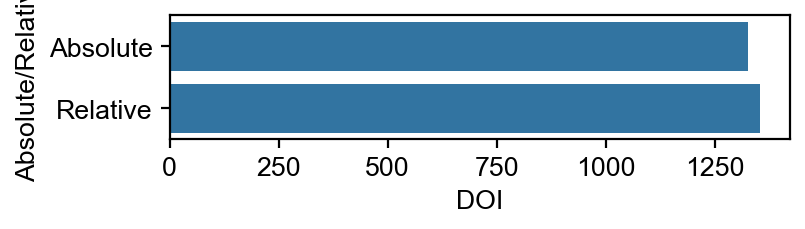

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    data=bar_annot_df.groupby('Absolute/Relative').count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby('Absolute/Relative').count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(0.2)

In [26]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().sum()

DOI        974
Mistake    974
Fig ID     974
dtype: int64

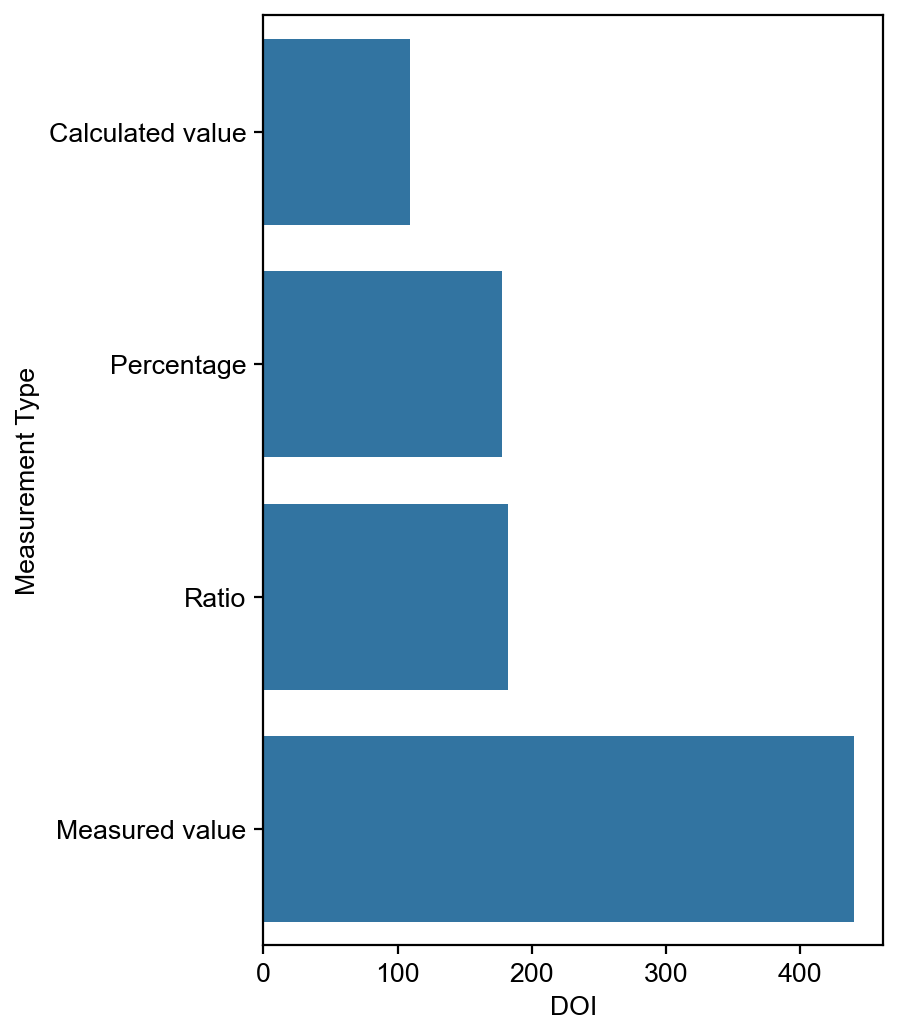

In [27]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby(['DOI', 'Mistake', 'Measurement Type']).count().iloc[:, 0].reset_index().groupby(['Measurement Type']).count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby(['DOI', 'Mistake', 'Measurement Type']).count().iloc[:, 0].reset_index().groupby(['Measurement Type']).count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

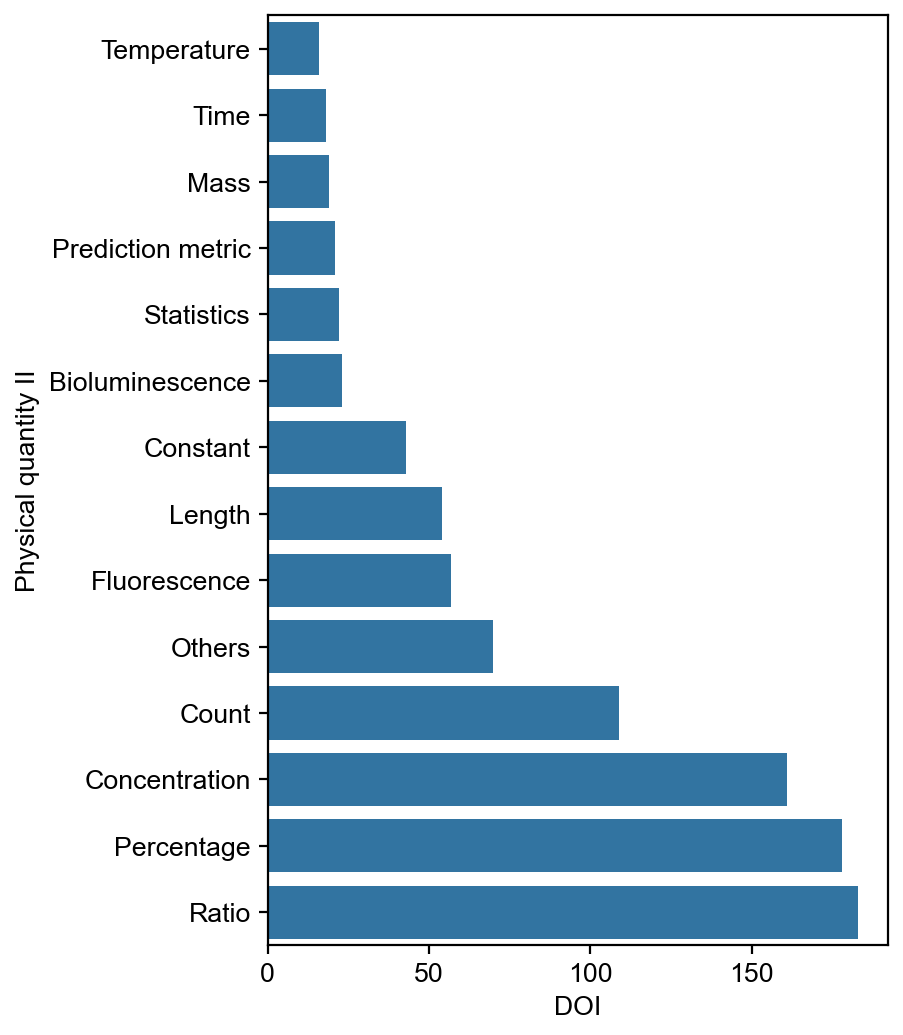

In [28]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

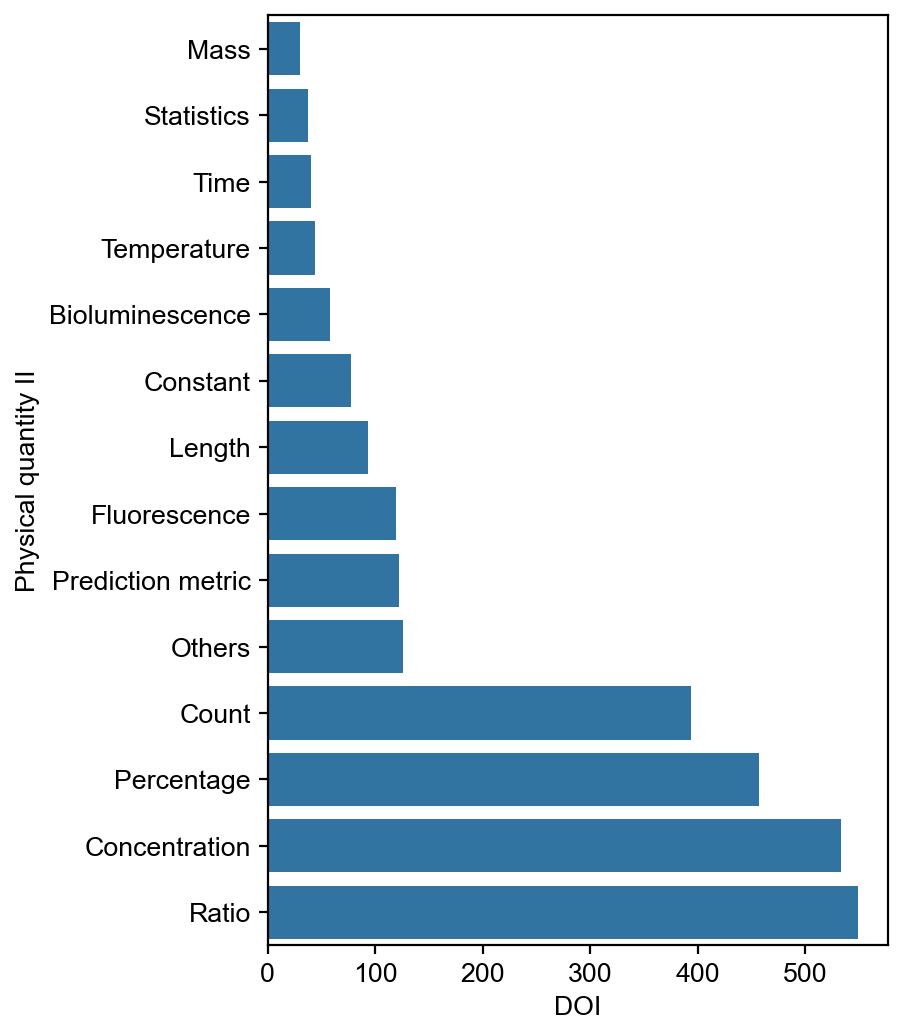

In [29]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby('Physical quantity II').count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby('Physical quantity II').count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

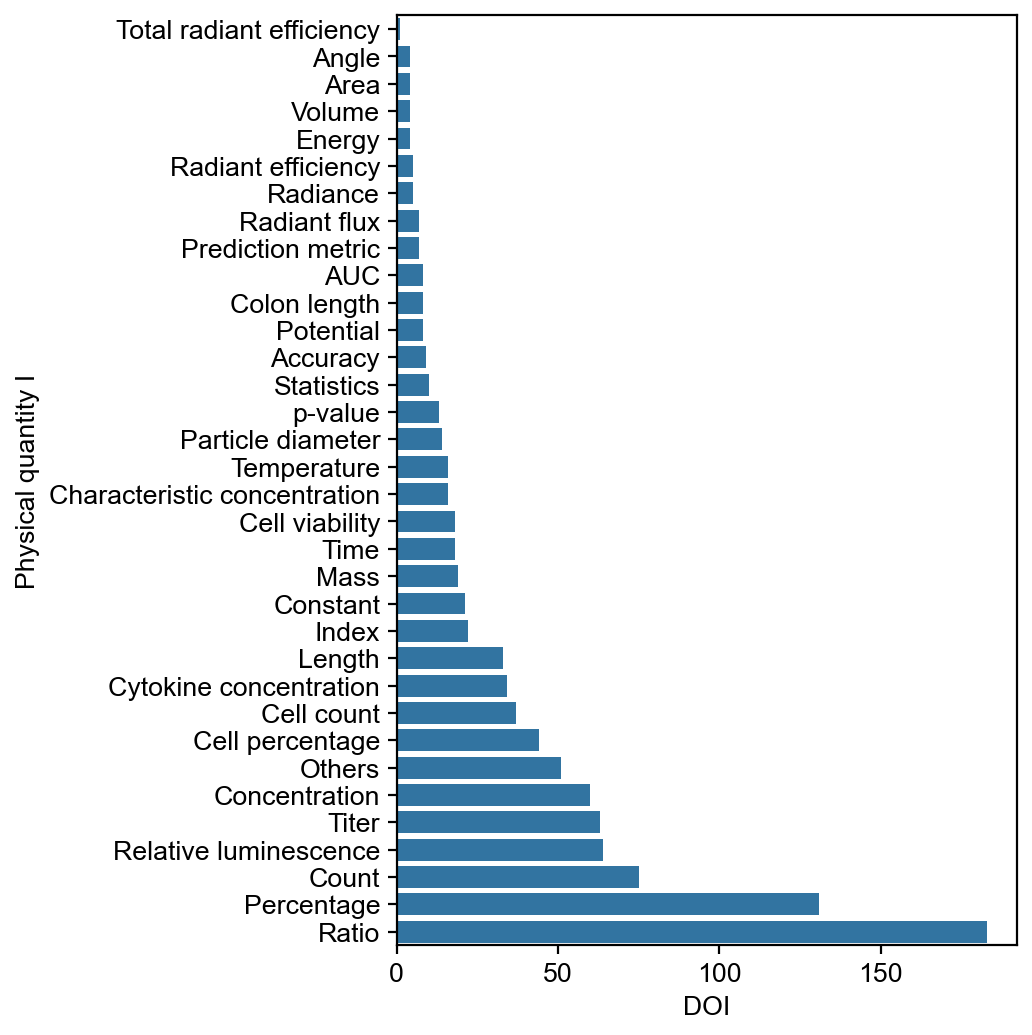

In [30]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

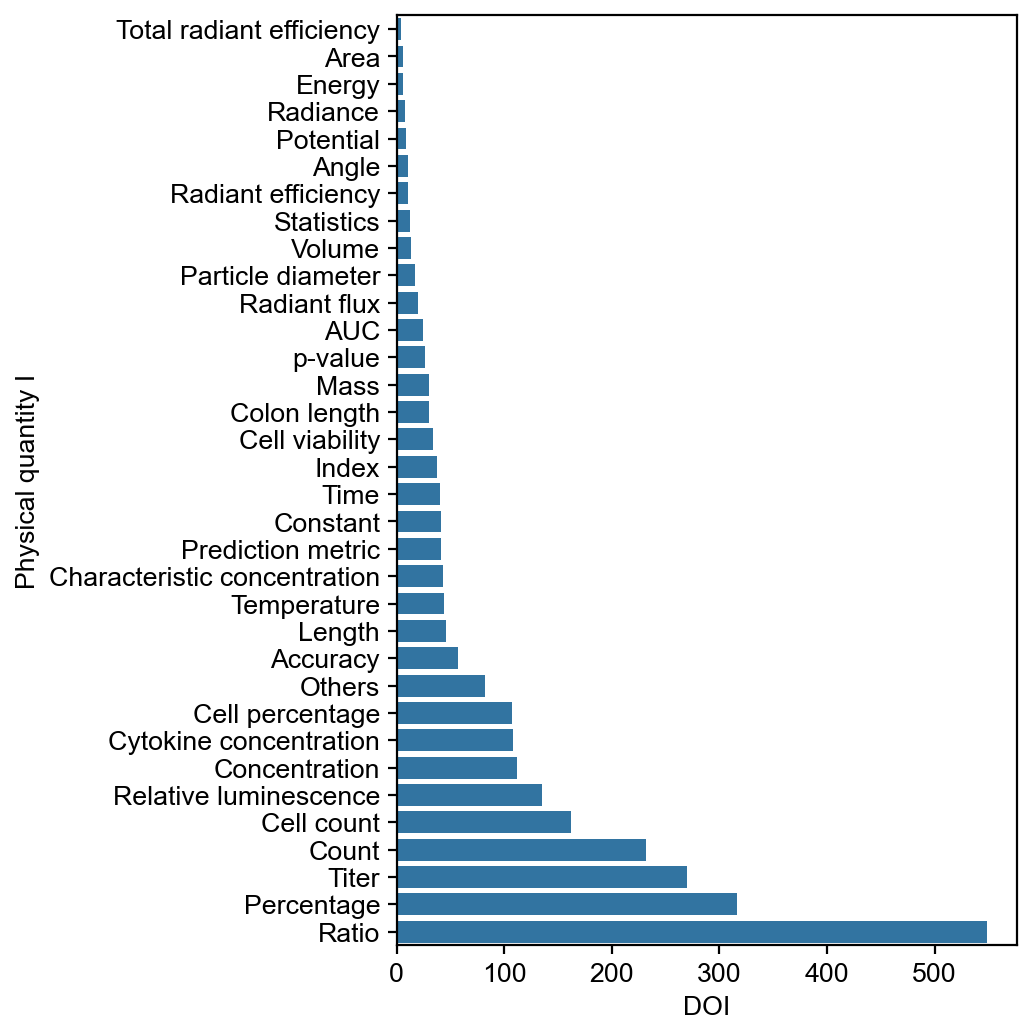

In [31]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby('Physical quantity I').count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby('Physical quantity I').count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

In [32]:
bar_annot_df[bar_annot_df['Physical quantity II'].isin(['Length'])].groupby('Physical quantity I').count()

,DOI,Mistake,Fig ID,Journal,Quantity,Absolute/Relative,Measurement Type,Physical quantity II,Log transformation
Physical quantity I,,,,,,,,,
Colon length,30,30,30,30,30,30,30,30,30
Length,46,46,46,46,46,46,46,46,46
Particle diameter,17,17,17,17,17,17,17,17,17


In [33]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count()

,DOI,Mistake,Fig ID
Physical quantity II,,,
Bioluminescence,23,23,23
Concentration,161,161,161
Constant,43,43,43
Count,109,109,109
Fluorescence,57,57,57
Length,54,54,54
Mass,19,19,19
Others,70,70,70
Percentage,178,178,178


In [34]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Absolute/Relative']).count().iloc[:, 0].reset_index().groupby(['Absolute/Relative']).count()

,DOI,Mistake,Fig ID
Absolute/Relative,,,
Absolute,423,423,423
Relative,434,434,434


## Bar-level data

In [35]:
X_LABEL = 'True Value'
Y_LABEL = 'Visualized Value'
ALPHA_MARK_LABEL = 'Mark Proportionality Constant'
ALPHA_DIFF_LABEL = 'Difference Proportionality Constant'

In [36]:
journals = [
    'acs_nano',
    'bioeng_transl_med',
    'cell',
    'nat_biomed_eng',
    'nat_biotechnol',
    'nat_cancer',
    'nat_cell_biol',
    'nat_nanotechnol',
    'nat_neurosci',
    'nat_plants',
    # 'nature',
    'sci_immunol',
    'sci_signal',
    'sci_transl_med',
    'science',
]
mistakes = [ZERO_SUBDIR, LOG_SUBDIR]
value_labels = [VAL_LABEL, VIZ_LABEL]
value_label_labels = [X_LABEL, Y_LABEL]

zero_bar_df_list = []
log_bar_df_list = []
for journal in journals:
    mistake_zero_bar_df_list = []
    mistake_log_bar_df_list = []
    for mistake in mistakes:
        # EXTRACT TRUE AND VISUALIZED VALUES
        for j, value_label in enumerate(value_labels):
            # get filepaths of digitized values in csv
            filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, journal, mistake)
            filenames = os.listdir(filepath)
            filenames = pd.Series(filenames)
            filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(value_label)]
            filenames = filenames.reset_index(drop=True)
            fignames = filenames.str.slice(stop=-8)
            fig_fullids = fignames.str.replace('fig', '')
            filepaths = filepath + os.sep + filenames
            # read individual csv
            raw_df_dict = {}
            for i, filepath in enumerate(filepaths):
                bar_df_ = pd.read_csv(filepath, header=None, index_col=0)
                bar_df_ = bar_df_.reset_index(drop=True)
                # bar_df_.columns = [value_label]
                bar_df_.columns = [value_label_labels[j]]
                # # add metadata
                # doi, _, figid = fig_fullids[i].split('_')
                # bar_df_['Journal'] = journal
                # bar_df_['DOI'] = doi
                # bar_df_['Mistake'] = mistake
                # bar_df_['Fig ID'] = figid
                raw_df_dict[fignames[i]] = bar_df_
            
            # construct mistake-level df
            mistake_level_bar_df = pd.concat(raw_df_dict)
            if mistake == ZERO_SUBDIR:
                mistake_zero_bar_df_list.append(mistake_level_bar_df)
            elif mistake == LOG_SUBDIR:
                mistake_log_bar_df_list.append(mistake_level_bar_df)
            else:
                raise ValueError

    # construct journal-level bar df
    # zero
    journal_zero_bar_df = mistake_zero_bar_df_list[0].copy()
    journal_zero_bar_df[Y_LABEL] = mistake_zero_bar_df_list[1][Y_LABEL]
    journal_zero_bar_df[ALPHA_MARK_LABEL] = journal_zero_bar_df[Y_LABEL] / journal_zero_bar_df[X_LABEL]
    zero_bar_df_list.append(journal_zero_bar_df)
    # log
    journal_log_bar_df = mistake_log_bar_df_list[0].copy()
    journal_log_bar_df[Y_LABEL] = mistake_log_bar_df_list[1][Y_LABEL]
    journal_log_bar_df[ALPHA_MARK_LABEL] = journal_log_bar_df[Y_LABEL] / journal_log_bar_df[X_LABEL]
    log_bar_df_list.append(journal_log_bar_df)

# construct overall df
zero_bar_df = pd.concat(zero_bar_df_list)
log_bar_df = pd.concat(log_bar_df_list)
bar_df = pd.concat([zero_bar_df, log_bar_df])
bar_df

True Value  Visualized Value  \
10.1021:acsnano.2c10352_zero_fig2 0   20.389610          0.259740   
                                  1   21.255411          0.281385   
                                  2   23.333333          0.333333   
                                  3   21.601732          0.290043   
                                  4   23.160173          0.329004   
...                                         ...               ...   
10.1126:science.ade3483_log_fig1  0  593.139572          0.924386   
                                  1  507.112096          0.901701   
                                  2    7.768894          0.296786   
                                  3    6.061899          0.260870   
                                  4    4.489251          0.217391   

                                     Mark Proportionality Constant  
10.1021:acsnano.2c10352_zero_fig2 0                       0.012739  
                                  1                       0.013238  
                                  2                       0.014286  
                                  3                       0.013427  
                                  4                       0.014206  
...                                                            ...  
10.1126:science.ade3483_log_fig1  0                       0.001558  
                                  1                       0.001778  
                                  2                       0.038202  
                                  3                       0.043034  
                                  4                       0.048425  

[13621 rows x 3 columns]

## Pairwise permutation-level metric

In [37]:
def perm_rel_change(df, label):
    perm_arr = itertools.permutations(df[label].reset_index(drop=True), 2)
    perm_arr = np.array(list(perm_arr))
    rel_change = (perm_arr[:, 1] - perm_arr[:, 0]) / perm_arr[:, 0]
    rel_change = pd.Series(rel_change)
    return pd.DataFrame(perm_arr), rel_change

In [38]:
def perm_rel_change(df, label):
    perm_arr = itertools.permutations(df[label].reset_index(drop=True), 2)
    perm_arr = pd.DataFrame(np.array(list(perm_arr)))
    return perm_arr

In [39]:
L_df_list = []
fig_id = np.unique(bar_df.index.get_level_values(0))
for i in range(len(fig_id)):
    df = bar_df[bar_df.index.get_level_values(0) == fig_id[i]]
    
    # generate permutations and their respective x, y values
    L_df_ = pd.concat(
        [
            perm_rel_change(df, X_LABEL), 
            perm_rel_change(df, Y_LABEL),
        ], 
        axis=1
    )
    L_df_.columns = ['x_1', 'x_2', 'y_1', 'y_2']

    # store bar id
    L_df_[['Bar 1 ID', 'Bar 2 ID']] = perm_rel_change(bar_df[bar_df.index.get_level_values(0) == fig_id[i]].reset_index(), 'level_1')
    
    # compute lie factor of relative change
    L_df_['E_x_12'] = (L_df_['x_1'] - L_df_['x_2']) / L_df_['x_2']
    L_df_['E_y_12'] = (L_df_['y_1'] - L_df_['y_2']) / L_df_['y_2']
    L_df_['L_12'] = L_df_['E_y_12'] / L_df_['E_x_12']
    L_df_['log L_12'] = np.log10(L_df_['L_12'])

    # compute GDI
    L_df_['GDI_12'] = 100 * (L_df_['L_12'] - 1)

    # compute lie factor of fold change
    L_df_['F_12'] = (L_df_['x_1'] / L_df_['x_2']) / (L_df_['y_1'] / L_df_['y_2'])
    L_df_['log F_12'] = np.log10(L_df_['F_12'])

    # compute RGD
    L_df_['RGD_12'] = L_df_['L_12'] - 1

    # add meta data
    # L_df_['Journal'] = df['Journal'][0]
    # L_df_['DOI'] = df['DOI'][0]
    # L_df_['Mistake'] = df['Mistake'][0]
    # L_df_['Fig ID'] = df['Fig ID'][0]
    L_df_['Fig Index'] = df.index.get_level_values(0)[0]
    
    # add quantity annotation
    # L_df_['Quantity'] = df['Quantity'][0]
    # L_df_['Absolute/Relative'] = df['Absolute/Relative'][0]
    # L_df_['Measurement Type'] = df['Measurement Type'][0]
    # L_df_['Physical quantity I'] = df['Physical quantity I'][0]
    # L_df_['Physical quantity II'] = df['Physical quantity II'][0]
    # L_df_['Log transformation'] = df['Log transformation'][0]
    
    L_df_list.append(L_df_)
L_df = pd.concat(L_df_list, ignore_index=True)
L_df = L_df.set_index('Fig Index')
# L_annotation_df = L_df[['Quantity', 'Absolute/Relative', 'Measurement Type', 'Physical quantity I', 'Physical quantity II', 'Log transformation']].copy()
# L_df = L_df.drop(['Quantity', 'Absolute/Relative', 'Measurement Type', 'Physical quantity I', 'Physical quantity II', 'Log transformation'], axis=1)
L_df

,x_1,x_2,y_1,y_2,Bar 1 ID,Bar 2 ID,E_x_12,E_y_12,L_12,log L_12,GDI_12,F_12,log F_12,RGD_12
Fig Index,,,,,,,,,,,,,,
10.1002:btm2.10487_log_fig1,0.941271,17.800504,0.352212,0.803540,0,1,-0.947121,-0.561674,0.593033,-0.226921,-40.696707,0.120638,-0.918515,-0.406967
10.1002:btm2.10487_log_fig1,0.941271,0.297195,0.352212,0.175221,0,2,2.167186,1.010101,0.466089,-0.331531,-53.391128,1.575635,0.197456,-0.533911
10.1002:btm2.10487_log_fig1,0.941271,3.977009,0.352212,0.573451,0,3,-0.763322,-0.385802,0.505426,-0.296343,-49.457437,0.385345,-0.414150,-0.494574
10.1002:btm2.10487_log_fig1,17.800504,0.941271,0.803540,0.352212,1,0,17.911138,1.281407,0.071542,-1.145436,-92.845753,8.289243,0.918515,-0.928458
10.1002:btm2.10487_log_fig1,17.800504,0.297195,0.803540,0.175221,1,2,58.895093,3.585859,0.060886,-1.215486,-93.911448,13.060824,1.115971,-0.939114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1126:scitranslmed.adi9867_log_fig2,1331.015174,786.004146,0.795732,0.742378,2,1,0.693395,0.071869,0.103647,-0.984441,-89.635255,1.579853,0.198617,-0.896353
10.1126:scitranslmed.adi9867_log_fig2,1331.015174,437.041699,0.795732,0.682927,2,3,2.045511,0.165179,0.080752,-1.092848,-91.924825,2.613772,0.417268,-0.919248
10.1126:scitranslmed.adi9867_log_fig2,437.041699,2504.337233,0.682927,0.859756,3,0,-0.825486,-0.205674,0.249155,-0.603531,-75.084527,0.219701,-0.658169,-0.750845


### Only median of each plot

- Bias in different number of bars
  - If include every point in each plot, graphs with more plots will have an advantage by pairwise permutation (n(n-1)).
  - Taking median of each plot?
- Bias in different number of plots for the same type of quantity
  - If include every similar plot, similar deviation is exaggerated
  - Taking median among all plots?
  - Do we have enough data point for journal level analysis?
- Put raw biased plots in supplemental information

In [40]:
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Mistake']])
plot_df

,x_1,x_2,y_1,y_2,Bar 1 ID,Bar 2 ID,E_x_12,E_y_12,L_12,log L_12,GDI_12,F_12,log F_12,RGD_12,Absolute/Relative,Mistake
Fig Index,,,,,,,,,,,,,,,,
10.1002:btm2.10487_log_fig1,2.459140,2.459140,0.462832,0.462832,1.5,1.5,0.741462,0.057445,0.417407,-0.382415,-58.259341,1.105150,0.000000e+00,-0.582593,Absolute,log
10.1002:btm2.10487_log_fig2,6.461362,6.461362,0.448692,0.448692,1.5,1.5,0.859204,0.077444,0.427339,-0.374663,-57.266116,1.099787,0.000000e+00,-0.572661,Absolute,log
10.1002:btm2.10499_zero_fig1,23.125241,23.125241,0.366089,0.366089,3.5,3.5,0.000306,0.003109,4.692459,0.664729,369.245939,1.001392,3.295975e-17,3.692459,Absolute,zero
10.1002:btm2.10499_zero_fig2,17.704626,17.704626,0.423488,0.423488,3.0,3.0,0.000014,0.000021,1.393557,0.144125,39.355742,1.000001,1.114018e-17,0.393557,Absolute,zero
10.1002:btm2.10499_zero_fig3,13.212996,13.212996,0.328520,0.328520,3.0,3.0,0.000007,0.000020,1.608791,0.206500,60.879121,1.000003,-2.016616e-17,0.608791,Absolute,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1126:scitranslmed.adi7244_zero_fig1,48.135048,48.135048,0.604502,0.604502,0.5,0.5,0.013930,0.102449,2.738993,0.433283,173.899336,1.040072,-6.938894e-18,1.738993,Relative,zero
10.1126:scitranslmed.adi7244_zero_fig2,88.396694,88.396694,0.439669,0.439669,0.5,0.5,0.001313,0.722065,27.002885,1.370101,2600.288534,1.652451,5.551115e-17,26.002885,Relative,zero
10.1126:scitranslmed.adi7244_zero_fig3,68.875639,68.875639,0.471891,0.471891,0.5,0.5,0.028594,0.462064,4.260902,0.604216,326.090183,1.246988,-5.551115e-17,3.260902,Relative,zero


In [41]:
import scipy
# absolute/relative
abs_cond = (plot_df['Absolute/Relative'] == 'Absolute')
rel_cond = (plot_df['Absolute/Relative'] == 'Relative')
# mistake: zero/log
log_cond = (plot_df['Mistake'] == 'log')
zero_cond = (plot_df['Mistake'] == 'zero')

In [42]:
scipy.stats.mannwhitneyu(
    plot_df.loc[abs_cond & log_cond, 'log L_12'].dropna(),
    plot_df.loc[rel_cond & log_cond, 'log L_12'].dropna(),
)

MannwhitneyuResult(statistic=61467.0, pvalue=1.2846062894007071e-26)

In [43]:
scipy.stats.mannwhitneyu(
    plot_df.loc[abs_cond & zero_cond, 'log L_12'].dropna(),
    plot_df.loc[rel_cond & zero_cond, 'log L_12'].dropna(),
)

MannwhitneyuResult(statistic=114854.0, pvalue=7.2514613406679e-10)

In [44]:
scipy.stats.mannwhitneyu(
    plot_df.loc[abs_cond & log_cond, 'log F_12'].dropna(),
    plot_df.loc[rel_cond & log_cond, 'log F_12'].dropna(),
)

MannwhitneyuResult(statistic=108432.5, pvalue=0.90481536353343)

In [45]:
scipy.stats.mannwhitneyu(
    plot_df.loc[abs_cond & zero_cond, 'log F_12'].dropna(),
    plot_df.loc[rel_cond & zero_cond, 'log F_12'].dropna(),
)

MannwhitneyuResult(statistic=145980.5, pvalue=0.49148666424228993)

In [46]:
result = scipy.stats.tukey_hsd(
    plot_df.loc[abs_cond & log_cond, 'log L_12'].dropna(),
    plot_df.loc[rel_cond & log_cond, 'log L_12'].dropna(),
    plot_df.loc[abs_cond & zero_cond, 'log L_12'].dropna(),
    plot_df.loc[rel_cond & zero_cond, 'log L_12'].dropna(),
)

In [47]:
result.pvalue

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.14683255e-06],
       [0.00000000e+00, 0.00000000e+00, 3.14683255e-06, 1.00000000e+00]])

In [48]:
bar_annot_df['Physical quantity II'][bar_annot_df['Physical quantity I'].isin(['Radiant flux'])]

Fig Index
10.1021:acsnano.2c10501_log_fig1        Bioluminescence
10.1021:acsnano.3c02268_log_fig1        Bioluminescence
10.1021:acsnano.3c02268_log_fig2        Bioluminescence
10.1038:s41551-023-01143-w_log_fig3     Bioluminescence
10.1038:s41587-023-01774-z_log_fig13    Bioluminescence
10.1038:s43018-023-00563-6_log_fig1     Bioluminescence
10.1038:s43018-023-00563-6_log_fig10    Bioluminescence
10.1038:s43018-023-00563-6_log_fig11    Bioluminescence
10.1038:s43018-023-00563-6_log_fig2     Bioluminescence
10.1038:s43018-023-00563-6_log_fig3     Bioluminescence
10.1038:s43018-023-00563-6_log_fig4     Bioluminescence
10.1038:s43018-023-00563-6_log_fig5     Bioluminescence
10.1038:s43018-023-00563-6_log_fig6     Bioluminescence
10.1038:s43018-023-00563-6_log_fig7     Bioluminescence
10.1038:s43018-023-00563-6_log_fig8     Bioluminescence
10.1038:s43018-023-00563-6_log_fig9     Bioluminescence
10.1038:s41556-023-01273-y_log_fig1     Bioluminescence
10.1126:sciimmunol.add5204_log_fig1   

In [49]:
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df)

plot_df.groupby(['Mistake', 'Physical quantity II']).count()

x_1  x_2  y_1  y_2  Bar 1 ID  Bar 2 ID  E_x_12  \
Mistake Physical quantity II                                                   
log     Bioluminescence        49   49   49   49        49        49      49   
        Concentration         317  317  317  317       317       317     317   
        Constant               16   16   16   16        16        16      16   
        Count                 204  204  204  204       204       204     204   
        Fluorescence           22   22   22   22        22        22      22   
        Length                  2    2    2    2         2         2       2   
        Mass                    3    3    3    3         3         3       3   
        Others                 39   39   39   39        39        39      39   
        Percentage             60   60   60   60        60        60      60   
        Ratio                 240  240  240  240       240       240     240   
        Statistics             25   25   25   25        25        25      25   
        Time                    2    2    2    2         2         2       2   
zero    Bioluminescence         3    3    3    3         3         3       3   
        Concentration         127  127  125  125       127       127     127   
        Constant               36   36   36   36        36        36      36   
        Count                 143  143  143  143       143       143     143   
        Fluorescence           61   61   61   61        61        61      61   
        Length                 61   61   61   61        61        61      61   
        Mass                   20   20   20   20        20        20      20   
        Others                 59   59   59   59        59        59      59   
        Percentage            199  199  199  199       199       199     199   
        Prediction metric     111  111  111  111       111       111     111   
        Ratio                 217  217  217  217       217       217     217   
        Statistics              8    8    8    8         8         8       8   
        Temperature            40   40   40   40        40        40      40   
        Time                   27   27   27   27        27        27      27   

                              E_y_12  L_12  log L_12  ...  log F_12  RGD_12  \
Mistake Physical quantity II                          ...                     
log     Bioluminescence           49    49        48  ...        49      49   
        Concentration            317   317       314  ...       317     317   
        Constant                  16    16        15  ...        16      16   
        Count                    204   204       204  ...       204     204   
        Fluorescence              22    22        22  ...        22      22   
        Length                     2     2         2  ...         2       2   
        Mass                       3     3         3  ...         3       3   
        Others                    39    39        37  ...        39      39   
        Percentage                60    60        60  ...        60      60   
        Ratio                    240   240       226  ...       233     240   
        Statistics                25    25         9  ...        25      25   
        Time                       2     2         2  ...         2       2   
zero    Bioluminescence            3     3         3  ...         3       3   
        Concentration            125   125       124  ...       125     125   
        Constant                  36    36        28  ...        36      36   
        Count                    143   143       142  ...       143     143   
        Fluorescence              61    61        61  ...        61      61   
        Length                    61    61        61  ...        61      61   
        Mass                      20    20        20  ...        20      20   
        Others                    59    59        58  ...        59      59   
        Percentage               199   199       19

In [50]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(plot_df.groupby(['Mistake', 'Physical quantity I']).count()['x_1'])

Mistake  Physical quantity I         
log      Area                              3
         Cell count                      108
         Cell percentage                  15
         Cell viability                    2
         Characteristic concentration     38
         Concentration                    27
         Constant                          9
         Count                            96
         Cytokine concentration           48
         Energy                            1
         Index                             7
         Length                            1
         Mass                              3
         Others                           34
         Particle diameter                 1
         Percentage                       43
         Potential                         1
         Radiance                          6
         Radiant efficiency                2
         Radiant flux                     20
         Ratio                           240
         Relative

In [51]:
plot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Mistake', 'Physical quantity II']).count()

DOI  x_1
Mistake Physical quantity II          
log     Bioluminescence        18   18
        Concentration          77   77
        Constant                8    8
        Count                  58   58
        Fluorescence           14   14
        Length                  2    2
        Mass                    1    1
        Others                 23   23
        Percentage             24   24
        Ratio                  75   75
        Statistics             11   11
        Time                    1    1
zero    Bioluminescence         2    2
        Concentration          50   50
        Constant               21   21
        Count                  28   28
        Fluorescence           26   26
        Length                 31   31
        Mass                   13   13
        Others                 31   31
        Percentage             91   91
        Prediction metric      16   16
        Ratio                  78   78
        Statistics              8    8
        Temperature            13   13
        Time                   13   13

In [52]:
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
plot_df

,Journal,DOI,Mistake,Physical quantity II,x_1,x_2,y_1,y_2,Bar 1 ID,Bar 2 ID,E_x_12,E_y_12,L_12,log L_12,GDI_12,F_12,log F_12,RGD_12
0,acs_nano,10.1021:acsnano.2c07293,zero,Temperature,40.690994,32.616460,0.827640,0.504658,0.0,2.00,0.144073,0.329177,2.585231,0.412499,158.523077,0.860738,-0.065129,1.585231
1,acs_nano,10.1021:acsnano.2c07436,log,Others,0.000273,0.000225,0.812121,0.783838,3.0,1.00,1.990668,0.202061,0.101507,-0.993505,-89.849276,2.487931,0.395831,-0.898493
2,acs_nano,10.1021:acsnano.2c07436,zero,Percentage,69.956332,67.161572,0.748908,0.679039,3.0,1.00,0.049762,0.122186,2.472669,0.393166,147.266881,0.935309,-0.029066,1.472669
3,acs_nano,10.1021:acsnano.2c07439,zero,Fluorescence,0.288557,0.043118,0.238938,0.129794,4.0,1.00,3.833333,0.741935,0.147727,-0.830539,-85.227273,2.705882,0.432309,-0.852273
4,acs_nano,10.1021:acsnano.2c08153,log,Concentration,12.254337,1.057942,0.892528,0.467438,4.5,4.25,7.610832,1.114541,0.084832,-1.112391,-91.516824,5.352501,0.691635,-0.915168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,science,10.1126:science.adi4720,zero,Temperature,72.022998,68.937198,0.801533,0.386712,2.5,1.00,0.033757,0.776572,17.524751,1.243470,1652.475136,0.601741,-0.220716,16.524751
729,science,10.1126:science.adi8885,log,Ratio,1.213554,0.741725,0.083935,-0.234274,0.0,1.00,1.608392,-0.471876,2.514590,0.731242,151.458985,-15.140926,-0.060626,1.514590
730,science,10.1126:science.adi8885,zero,Count,8.608350,6.798058,0.690909,0.495396,0.0,1.00,0.221012,0.346734,1.789877,0.252823,78.987730,0.889580,-0.050815,0.789877
731,science,10.1126:science.adi8885,zero,Percentage,76.182553,52.688033,0.769709,0.378134,1.0,0.00,0.418345,1.991251,3.196228,0.439864,219.622776,0.679365,-0.219349,2.196228


In [53]:
plot_df.groupby(['Mistake', 'Physical quantity II']).count()

Journal  DOI  x_1  x_2  y_1  y_2  Bar 1 ID  \
Mistake Physical quantity II                                               
log     Bioluminescence            18   18   18   18   18   18        18   
        Concentration              77   77   77   77   77   77        77   
        Constant                    8    8    8    8    8    8         8   
        Count                      58   58   58   58   58   58        58   
        Fluorescence               14   14   14   14   14   14        14   
        Length                      2    2    2    2    2    2         2   
        Mass                        1    1    1    1    1    1         1   
        Others                     23   23   23   23   23   23        23   
        Percentage                 24   24   24   24   24   24        24   
        Ratio                      75   75   75   75   75   75        75   
        Statistics                 11   11   11   11   11   11        11   
        Time                        1    1    1    1    1    1         1   
zero    Bioluminescence             2    2    2    2    2    2         2   
        Concentration              50   50   50   50   49   49        50   
        Constant                   21   21   21   21   21   21        21   
        Count                      28   28   28   28   28   28        28   
        Fluorescence               26   26   26   26   26   26        26   
        Length                     31   31   31   31   31   31        31   
        Mass                       13   13   13   13   13   13        13   
        Others                     31   31   31   31   31   31        31   
        Percentage                 91   91   91   91   91   91        91   
        Prediction metric          16   16   16   16   16   16        16   
        Ratio                      78   78   78   78   78   78        78   
        Statistics                  8    8    8    8    8    8         8   
        Temperature                13   13   13   13   13   13        13   
        Time                       13   13   13   13   13   13        13   

                              Bar 2 ID  E_x_12  E_y_12  L_12  log L_12  \
Mistake Physical quantity II                                             
log     Bioluminescence             18      18      18    18        18   
        Concentration               77      77      77    77        76   
        Constant                     8       8       8     8         8   
        Count                       58      58      58    58        58   
        Fluorescence                14      14      14    14        14   
        Length                       2       2       2     2         2   
        Mass                         1       1       1     1         1   
        Others                      23      23      23    23        23   
        Percentage                  24      24      24    24        24   
        Ratio                       75      75      75    75        72   
        Statistics                  11      11      11    11         4   
        Time                         1       1       1     1         1   
zero    Bioluminescence              2       2       2     2         2   
        Concentration               50      50      49    49        49   
        Constant                    21      21      21    21        18   
        Count                       28      28      28    28        27   
        Fluorescence                26      26      26    26        26   
        Length                      31      31      31    31        31   
        Mass                        13      13      13    13        13   
        Others                      31      31      31    31        31   
        Percentage                  91      91      91    91        91   
        Prediction metric           16      16      16    16        16   
        Ratio                       78      78      78    78        77   
        Statistics                   8       8     

In [86]:
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()

In [87]:
scipy.stats.mannwhitneyu(
    plot_df.loc[(plot_df['Mistake'] == 'log') & (plot_df['Absolute/Relative'] == 'Absolute'), 'log L_12'].dropna(),
    plot_df.loc[(plot_df['Mistake'] == 'log') & (plot_df['Absolute/Relative'] == 'Relative'), 'log L_12'].dropna(),
)

MannwhitneyuResult(statistic=7195.0, pvalue=2.7259481274548356e-07)

In [88]:
scipy.stats.mannwhitneyu(
    plot_df.loc[(plot_df['Mistake'] == 'zero') & (plot_df['Absolute/Relative'] == 'Absolute'), 'log L_12'].dropna(),
    plot_df.loc[(plot_df['Mistake'] == 'zero') & (plot_df['Absolute/Relative'] == 'Relative'), 'log L_12'].dropna(),
)

MannwhitneyuResult(statistic=19604.0, pvalue=0.13879325984906024)

In [89]:
scipy.stats.mannwhitneyu(
    plot_df.loc[(plot_df['Mistake'] == 'zero') & (plot_df['Absolute/Relative'] == 'Absolute'), 'log L_12'].dropna(),
    plot_df.loc[(plot_df['Mistake'] == 'log') & (plot_df['Absolute/Relative'] == 'Absolute'), 'log L_12'].dropna(),
)

MannwhitneyuResult(statistic=31826.0, pvalue=1.2102402025209464e-58)

In [90]:
scipy.stats.mannwhitneyu(
    plot_df.loc[(plot_df['Mistake'] == 'zero') & (plot_df['Absolute/Relative'] == 'Relative'), 'log L_12'].dropna(),
    plot_df.loc[(plot_df['Mistake'] == 'log') & (plot_df['Absolute/Relative'] == 'Relative'), 'log L_12'].dropna(),
)

MannwhitneyuResult(statistic=27957.0, pvalue=4.557876390335287e-44)

F_12

In [98]:
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()

In [99]:
scipy.stats.mannwhitneyu(
    plot_df.loc[(plot_df['Mistake'] == 'log') & (plot_df['Absolute/Relative'] == 'Absolute'), 'log F_12'].dropna(),
    plot_df.loc[(plot_df['Mistake'] == 'log') & (plot_df['Absolute/Relative'] == 'Relative'), 'log F_12'].dropna(),
)

MannwhitneyuResult(statistic=13732.0, pvalue=0.006787214697823875)

In [100]:
scipy.stats.mannwhitneyu(
    plot_df.loc[(plot_df['Mistake'] == 'zero') & (plot_df['Absolute/Relative'] == 'Absolute'), 'log F_12'].dropna(),
    plot_df.loc[(plot_df['Mistake'] == 'zero') & (plot_df['Absolute/Relative'] == 'Relative'), 'log F_12'].dropna(),
)

MannwhitneyuResult(statistic=22802.5, pvalue=0.4239505040117818)

In [101]:
scipy.stats.mannwhitneyu(
    plot_df.loc[(plot_df['Mistake'] == 'zero') & (plot_df['Absolute/Relative'] == 'Absolute'), 'log F_12'].dropna(),
    plot_df.loc[(plot_df['Mistake'] == 'log') & (plot_df['Absolute/Relative'] == 'Absolute'), 'log F_12'].dropna(),
)

MannwhitneyuResult(statistic=589.0, pvalue=4.9636087892434204e-58)

In [102]:
scipy.stats.mannwhitneyu(
    plot_df.loc[(plot_df['Mistake'] == 'zero') & (plot_df['Absolute/Relative'] == 'Relative'), 'log F_12'].dropna(),
    plot_df.loc[(plot_df['Mistake'] == 'log') & (plot_df['Absolute/Relative'] == 'Relative'), 'log F_12'].dropna(),
)

MannwhitneyuResult(statistic=1195.0, pvalue=1.065576777692903e-46)

(737, 19)
(737, 19)


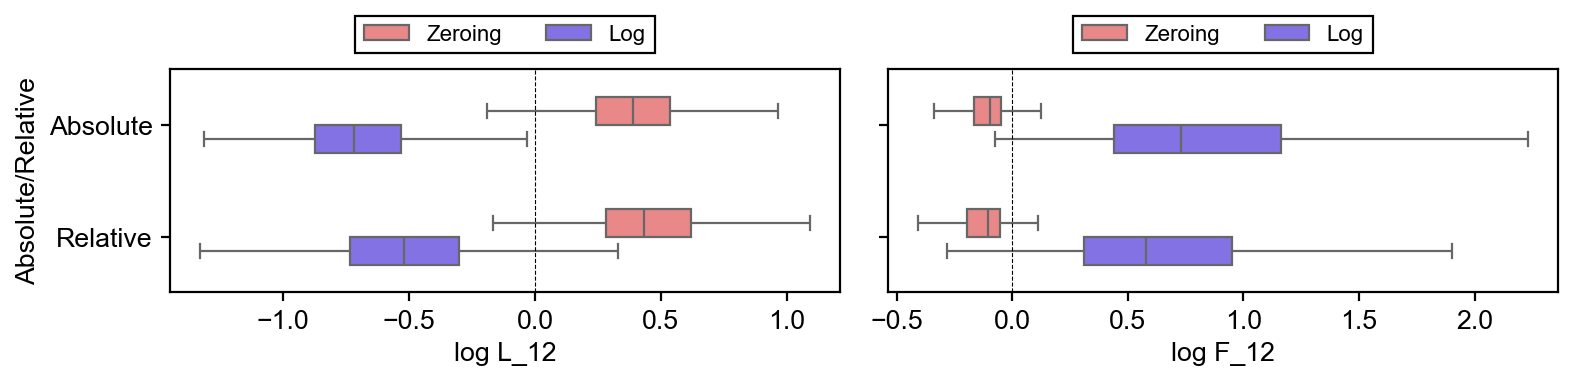

In [307]:
row = 1
col = 2
scale = 3
fig, axs = plt.subplots(row, col, figsize=(10, 5), sharey=True)
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)
box = sns.boxplot(
    plot_df,
    x='log L_12',
    y='Absolute/Relative',
    hue='Mistake', 
    ax=axs[0],
    width=0.5,
    showfliers=False,
    order=['Absolute', 'Relative'],
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
    saturation=0.85,
)
# configure legend
sns.move_legend(
    box, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=[ZERO_LABEL, LOG_LABEL],
        ncol=2,
    )
)

plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)
box = sns.boxplot(
    plot_df,
    x='log F_12', 
    y='Absolute/Relative',
    hue='Mistake',
    ax=axs[1],
    width=0.5,
    showfliers=False,
    order=['Absolute', 'Relative'],
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
    saturation=0.85,
)
# configure legend
sns.move_legend(
    box, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=[ZERO_LABEL, LOG_LABEL],
        ncol=2,
    )
)

for i in range(col):
    axs[i].axvline(0, color='k', ls='--', lw=0.5, zorder=999)
    axs[i].set_box_aspect(1/3)
    # axs[i].axis('off')
plt.tight_layout()

In [107]:
np.unique(plot_df['Physical quantity II'])

array(['Bioluminescence', 'Concentration', 'Constant', 'Count',
       'Fluorescence', 'Length', 'Mass', 'Others', 'Percentage',
       'Prediction metric', 'Ratio', 'Statistics', 'Temperature', 'Time'],
      dtype=object)

In [116]:
order = [
    'Percentage',
    'Ratio', 
    
    'Prediction metric', 
    'Statistics', 
    
    'Constant', 
    'Count',
    
    'Bioluminescence', 
    'Fluorescence', 
    
    'Concentration', 
    'Length', 
    'Mass', 
    'Temperature', 
    'Time',
    'Others', 
]

(737, 19)
(737, 19)


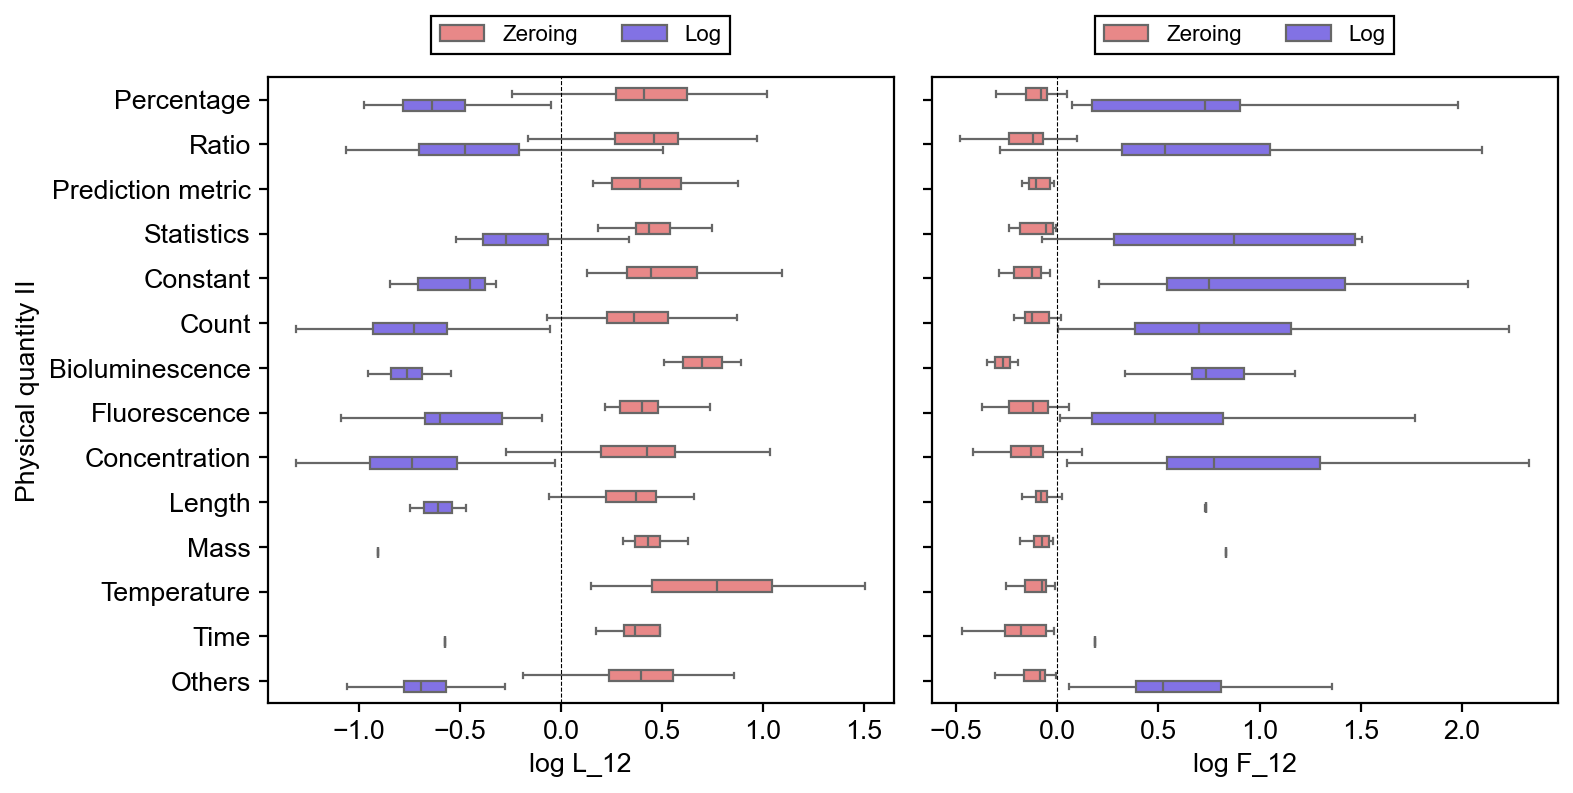

In [233]:
# plot n as one of the subplot
row = 1
col = 2
scale = 3
fig, axs = plt.subplots(row, col, figsize=(10, 5), sharey=True)
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)

box = sns.boxplot(
    plot_df,
    x='log L_12',
    y='Physical quantity II',
    hue='Mistake', 
    ax=axs[0],
    width=0.5,
    legend=True,
    showfliers=False,
    order=order,
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
    saturation=0.85,
)
# configure legend
sns.move_legend(
    box, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=[ZERO_LABEL, LOG_LABEL],
        ncol=2,
    )
)


plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)

box = sns.boxplot(
    plot_df,
    x='log F_12', 
    y='Physical quantity II',
    hue='Mistake', 
    ax=axs[1],
    width=0.5,
    legend=True,
    showfliers=False,
    order=order,
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
    saturation=0.85,
)
# configure legend
sns.move_legend(
    box, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=[ZERO_LABEL, LOG_LABEL],
        ncol=2,
    )
)

for i in range(col):
    axs[i].axvline(0, color='k', ls='--', lw=0.5, zorder=999)
    axs[i].set_box_aspect(1)
plt.tight_layout()

### Physical quantity I

(759, 19)
(759, 19)


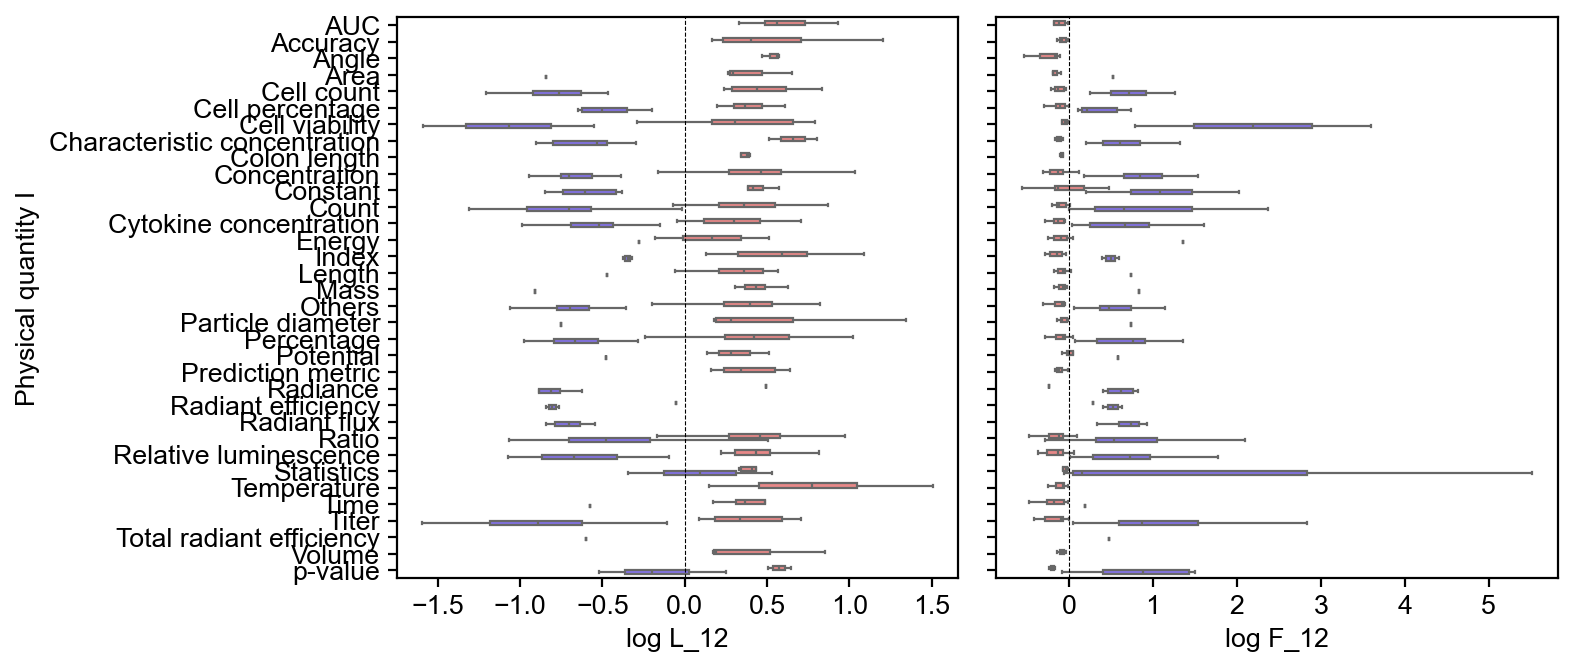

In [56]:
row = 1
col = 2
scale = 3
fig, axs = plt.subplots(row, col, figsize=(10, 5), sharey=True)
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']).median().reset_index()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log L_12',
    y='Physical quantity I',
    hue='Mistake', 
    ax=axs[0],
    width=0.5,
    legend=False,
    showfliers=False,
    order=np.unique(plot_df['Physical quantity I']),
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
    saturation=0.85,
)
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']).median().reset_index()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log F_12', 
    y='Physical quantity I',
    hue='Mistake', 
    ax=axs[1],
    width=0.5,
    legend=False,
    showfliers=False,
    order=np.unique(plot_df['Physical quantity I']),
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
    saturation=0.85,
)
for i in range(col):
    axs[i].axvline(0, color='k', ls='--', lw=0.5, zorder=999)
    axs[i].set_box_aspect(1)
plt.tight_layout()

(737, 19)
(737, 19)


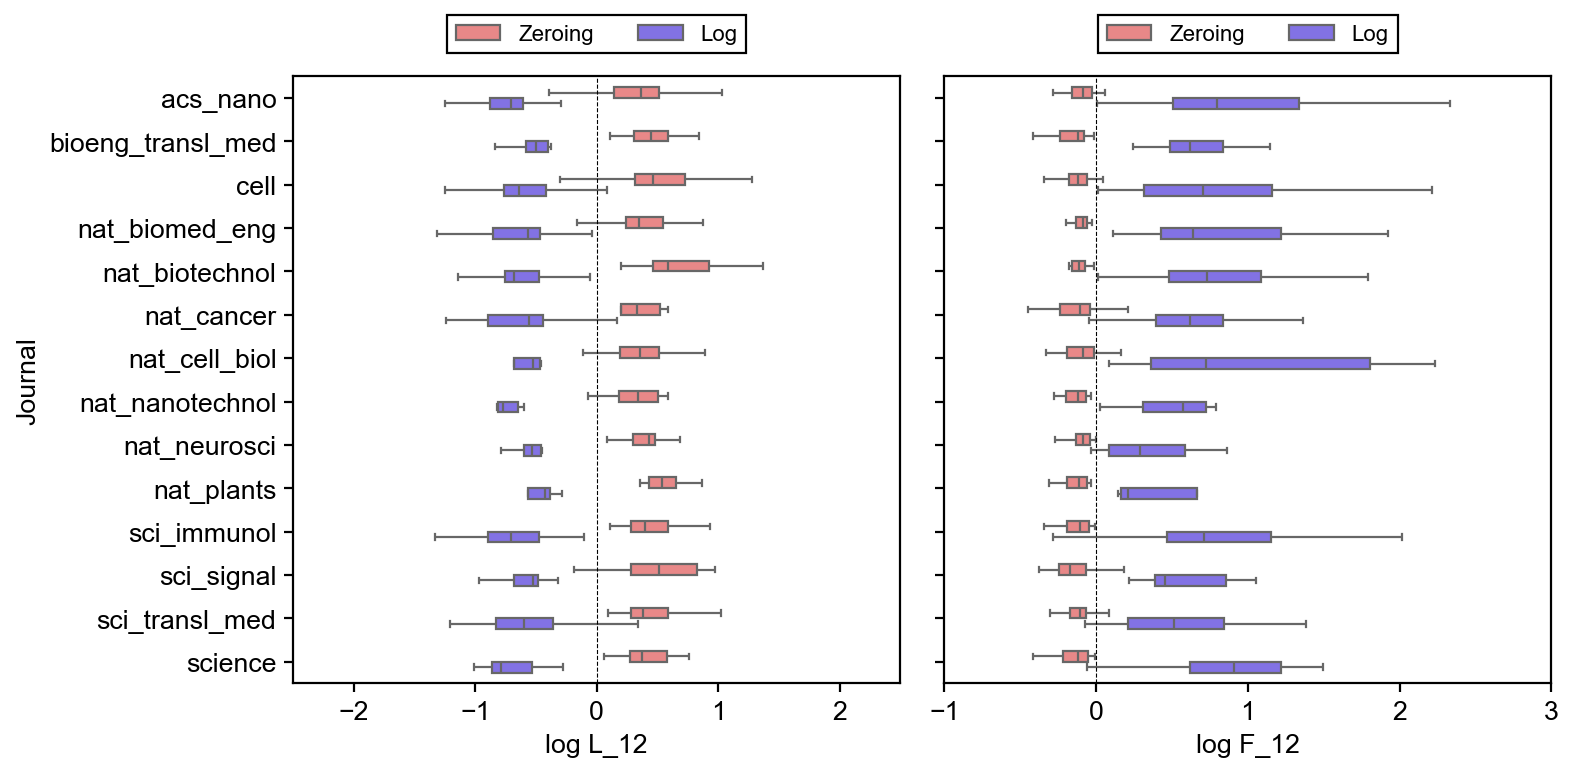

In [400]:
row = 1
col = 2
scale = 3
fig, axs = plt.subplots(row, col, figsize=(10, 5), sharey=True)
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)

box = sns.boxplot(
    plot_df,
    x='log L_12',
    y='Journal',
    hue='Mistake', 
    ax=axs[0],
    width=0.5,
    showfliers=False,
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
    saturation=0.85,
)
axs[0].set_xlim(-2.5, 2.5)

# configure legend
sns.move_legend(
    box, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=[ZERO_LABEL, LOG_LABEL],
        ncol=2,
    )
)

plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)
box = sns.boxplot(
    plot_df,
    x='log F_12', 
    y='Journal',
    hue='Mistake', 
    ax=axs[1],
    width=0.5,
    showfliers=False,
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
    saturation=0.85,
)
axs[1].set_xlim(-1, 3)

# configure legend
sns.move_legend(
    box, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=[ZERO_LABEL, LOG_LABEL],
        ncol=2,
    )
)

for i in range(col):
    axs[i].axvline(0, color='k', ls='--', lw=0.5, zorder=999)
    axs[i].set_box_aspect(1)
plt.tight_layout()

n = 439 Zeroing
n = 318 Log
(757, 18)
n = 439 Zeroing
n = 318 Log
(757, 18)


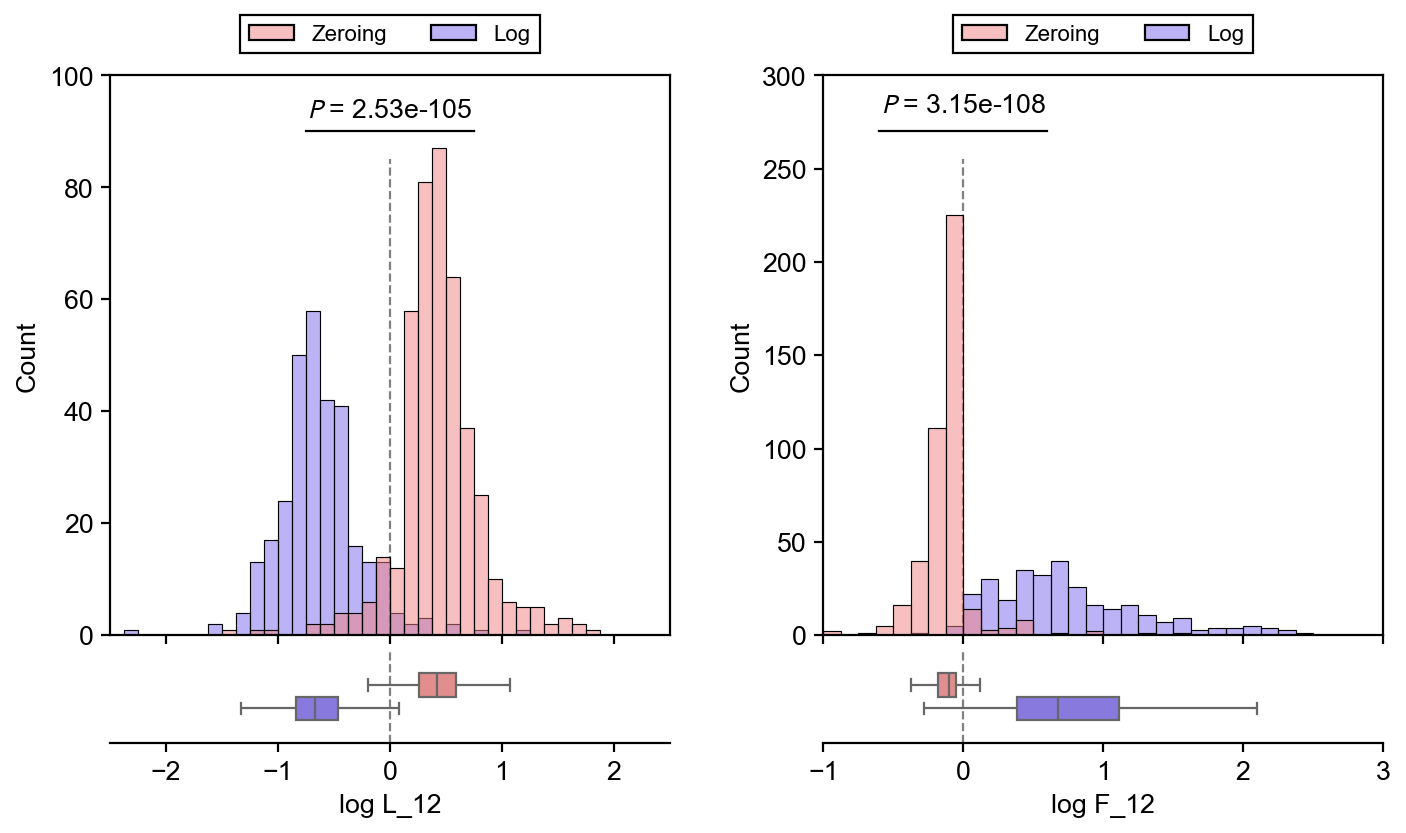

In [401]:
bins = np.arange(-2.5, 2.5 + 0.125, 0.125)

fig, axs = plt.subplots(2, 2, figsize=(9, 5), height_ratios=[6, 1])
ax_box_rel = axs[1, 0]
ax_hist_rel = axs[0, 0]
ax_box_abs = axs[1, 1]
ax_hist_abs = axs[0, 1]

## subplot 1
# eliminate bar-level bias by groupby graphs
plot_df = L_df.groupby(L_df.index).median()
# tag on text properties
plot_df = plot_df.join(bar_annot_df[['Journal', 'DOI', 'Mistake', 'Physical quantity I']])
# eliminate graph-level bias by groupby physical quantities
plot_df = plot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity I']).median()
plot_df = plot_df.reset_index()
print(f"n = {sum(plot_df['Mistake'] == 'zero')} Zeroing")
print(f"n = {sum(plot_df['Mistake'] == 'log')} Log")
print(plot_df.shape)

sns.boxplot(
    plot_df,
    x='log L_12',
    hue='Mistake', 
    ax=ax_box_rel,
    width=0.5,
    legend=False,
    showfliers=False,
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
)
hist = sns.histplot(
    plot_df,
    x='log L_12', 
    hue='Mistake', 
    # kde=True,
    bins=bins,
    ax=ax_hist_rel,
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
)
ax_box_rel.set_xlim(-2.5, 2.5)
ax_hist_rel.set_xlim(-2.5, 2.5)
ax_hist_rel.set_ylim(0, 100)

# configure legend
sns.move_legend(
    hist, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=[ZERO_LABEL, LOG_LABEL],
        ncol=2,
    )
)

# label p-value
stat, pvalue = scipy.stats.mannwhitneyu(
    plot_df.loc[plot_df['Mistake'] == 'zero', 'log L_12'].dropna(),
    plot_df.loc[plot_df['Mistake'] == 'log', 'log L_12'].dropna(),
)
ax_hist_rel.text(
    0, 
    92.5, 
    '$\it{P}$ = ' + f'{pvalue:.2e}',
    ha='center',
)
ax_hist_rel.axhline(
    90,
    0.35, 
    0.65,
    color='k',
    lw=1,
)

## subplot 2
# eliminate bar-level bias by groupby graphs
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
# tag on text properties
plot_df = plot_df.join(bar_annot_df[['Journal', 'DOI', 'Mistake', 'Physical quantity I']])  
# eliminate graph-level bias by groupby physical quantities
plot_df = plot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity I']).median()
plot_df = plot_df.reset_index()
print(f"n = {sum(plot_df['Mistake'] == 'zero')} Zeroing")
print(f"n = {sum(plot_df['Mistake'] == 'log')} Log")
print(plot_df.shape)

sns.boxplot(
    plot_df,
    x='log F_12',
    hue='Mistake', 
    ax=ax_box_abs,
    width=0.5,
    legend=False,
    showfliers=False,
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
)
hist = sns.histplot(
    plot_df,
    x='log F_12', 
    hue='Mistake', 
    # kde=True,
    bins=bins,
    ax=ax_hist_abs,
    hue_order=['zero', 'log'],
    palette=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR],
)
ax_box_abs.set_xlim(-1, 3)
ax_hist_abs.set_xlim(-1, 3)
ax_hist_abs.set_ylim(0, 300)

# configure legend
sns.move_legend(
    hist, 
    loc='lower center', 
    **dict(
        bbox_to_anchor=(0.5, 1.02),
        title='',
        labels=[ZERO_LABEL, LOG_LABEL],
        ncol=2,
    )
)

# label p-value
stat, pvalue = scipy.stats.mannwhitneyu(
    plot_df.loc[plot_df['Mistake'] == 'zero', 'log F_12'].dropna(),
    plot_df.loc[plot_df['Mistake'] == 'log', 'log F_12'].dropna(),
)
ax_hist_abs.text(
    0, 
    280, 
    '$\it{P}$ = ' + f'{pvalue:.2e}',
    ha='center',
)
ax_hist_abs.axhline(
    270,
    0.10, 
    0.4,
    color='k',
    lw=1,
)

# common labels by row and col
for i in range(2):
    pass
    axs[1, i].set_box_aspect(1/6)
    axs[1, i].axis()
    # axs[1, i].axis('off')
    axs[1, i].spines['left'].set_linewidth(0)
    axs[1, i].spines['right'].set_linewidth(0)
    axs[1, i].spines['top'].set_linewidth(0)
    axs[1, i].tick_params(
        axis='y',
        which='both',
        left=False,
    )
    axs[1, i].axvline(0, 0, 1, color='gray', lw=1, ls='--', zorder=0)
for i in range(2):
    axs[0, i].set_box_aspect(1)
    axs[0, i].set_xlabel('')
    axs[0, i].set_xticklabels('')
    # axs[0, i].axis('off')
    # axs[0, i].spines['top'].set_linewidth(0)
    # axs[0, i].spines['right'].set_linewidth(0)
    # axs[0, i].spines['bottom'].set_linewidth(0)
    axs[0, i].axvline(0, 0, 0.85, color='gray', lw=1, ls='--', zorder=0)

plt.tight_layout(pad=0)

!!! n subject to change, preliminary !!!

Distribution of log-transformed lie factor of (a) relative change and (b) fold change for quantity-normalized zeroing (n = 439) and log (n = 318) mistakes. 

## Graph-level metric

In [58]:
grouped_alpha = (bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0))
grouped_alpha_inverse = (1 / bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0))

In [59]:
cv_df = grouped_alpha.std() / grouped_alpha.mean()
cv_df = cv_df.to_frame()
cv_df.columns = ['CV alpha_i']
cv_df['log CV alpha_i'] = np.log10(cv_df['CV alpha_i'])

cv_df['CV alpha_i inverse'] = grouped_alpha_inverse.std() / grouped_alpha_inverse.mean()
cv_df['log CV alpha_i inverse'] = np.log10(cv_df['CV alpha_i inverse'])

cv_df['Mean CV alpha_i'] = (cv_df['CV alpha_i'] + cv_df['CV alpha_i inverse']) / 2
cv_df['log Mean CV alpha_i'] = np.log10(cv_df['Mean CV alpha_i'])

cv_df['IQR over median alpha_i'] = (grouped_alpha.quantile(0.75) - grouped_alpha.quantile(0.25)) / grouped_alpha.median()
cv_df['log IQR over median alpha_i'] = np.log10(cv_df['IQR over median alpha_i'])

cv_df['IQR over median alpha_i inverse'] = (grouped_alpha_inverse.quantile(0.75) - grouped_alpha_inverse.quantile(0.25)) / grouped_alpha_inverse.median()
cv_df['log IQR over median alpha_i inverse'] = np.log10(cv_df['IQR over median alpha_i inverse'])

cv_df['Mean IQR over median alpha_i'] = (cv_df['IQR over median alpha_i'] + cv_df['IQR over median alpha_i inverse']) / 2
cv_df['log Mean IQR over median alpha_i'] = np.log10(cv_df['Mean IQR over median alpha_i'])

cv_df['MAD alpha_i'] = grouped_alpha.agg(lambda pop: np.median(np.abs(pop - np.median(pop)))) / grouped_alpha.median()
cv_df['log MAD alpha_i'] = np.log10(cv_df['MAD alpha_i'])

cv_df['MAD alpha_i inverse'] = grouped_alpha_inverse.agg(lambda pop: np.median(np.abs(pop - np.median(pop)))) / grouped_alpha_inverse.median()
cv_df['log MAD alpha_i inverse'] = np.log10(cv_df['MAD alpha_i inverse'])

cv_df['Mean MAD alpha_i'] = (cv_df['MAD alpha_i'] + cv_df['MAD alpha_i inverse']) / 2
cv_df['log Mean MAD alpha_i'] = np.log10(cv_df['Mean MAD alpha_i'])

# cv_df = pd.DataFrame(np.abs(np.log10(bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0)).std() / np.log10(bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0)).mean()))

# tag meta data
cv_df['Mistake'] = bar_df.groupby(bar_df.index.get_level_values(0))['Mistake'].unique().str.get(0)
cv_df

KeyError: 'Column not found: Mistake'

In [ ]:
property_list = [
    'CV alpha_i',
    # 'CV alpha_i inverse',
    # 'Mean CV alpha_i',
    'IQR over median alpha_i',
    # 'IQR over median alpha_i inverse',
    # 'Mean IQR over median alpha_i',
    'MAD alpha_i',
    # 'MAD alpha_i inverse',
    # 'Mean MAD alpha_i',
]
row = 2
col = len(property_list)
scale = 3
fig, axs = plt.subplots(row, col, figsize=(col*scale, row*scale))
for col_i in range(col):
    sns.histplot(
        cv_df[cv_df['CV alpha_i'] > 0],
        x=property_list[col_i],
        hue='Mistake',
        bins=40,
        kde=True,
        # bins=np.linspace(-3.5, 3.5, 29),
        ax=axs[0, col_i],
    )
    sns.histplot(
        cv_df[cv_df['CV alpha_i'] > 0],
        x=f'log {property_list[col_i]}',
        hue='Mistake',
        bins=40,
        kde=True,
        # bins=np.linspace(-3.5, 3.5, 29),
        ax=axs[1, col_i],
    )
for col_i in range(col):
    for row_i in range(row):
        axs[row_i, col_i].set_box_aspect(1)
plt.tight_layout(pad=0.2)